# 5.1

5.1.1-5.1.2

In [327]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [328]:
def g(X,p):
    return np.power(X,p)

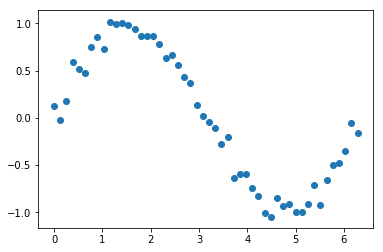

In [329]:
def f(x):
    return np.sin(x)
pi=math.pi
xmin,xmax,npts=[0,2*pi,50]
X=np.linspace(xmin,xmax,npts)
Y=f(X)+np.random.normal(0,scale=0.1,size=np.shape(X))
plt.scatter(X,Y,marker='o')

In [330]:
X=X.reshape(50,1)

In [331]:

def Amat(p):
    Xmat=[]
    for i in range(1,p+1):
        Xmat.append(g(X,i))
    Xmat=np.asarray(Xmat)
    Xmat=Xmat.reshape(p,50)
    Xmat=Xmat.T
    col1=np.ones(np.shape(Xmat)[0]).reshape(np.shape(X)[0],1)
    Xmat=np.concatenate((col1,Xmat),axis=1)
    return Xmat

In [332]:
Amat(2).shape

(50, 3)

In [333]:
def gradsqloss(Amat,y,wt,lamda):
    n,p=Amat.shape
    return (-2/n)*Amat.T.dot((y-Amat.dot(wt)))+2*lamda*(wt.T)
def gradientdescent(Amat,y,winit,lamda,rate,numiter):
    n,p=Amat.shape
    whistory=[]
    mean_rss_history=[]
    w=winit
    for i in range(numiter):
        mean_rss=np.square(y-Amat.dot(w)).mean()
        whistory.append(w)
        mean_rss_history.append(mean_rss)
        grad=gradsqloss(Amat,y,w,lamda)
        w=w-rate*grad
    return w,np.asarray(whistory),np.asarray(mean_rss_history)

In [334]:
def pred(j,w,x):
    predict=w[0]
    for p in range(1,j+1):
        predict+=w[p]*(x**p)
    return predict

Text(0,0.5,'y')

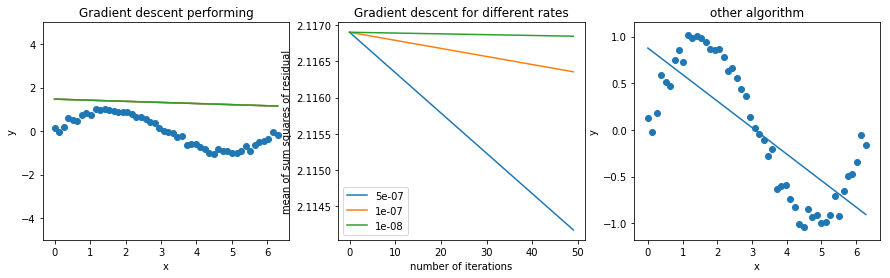

In [335]:
lamda=1
Xmat=Amat(1)
n,p=Xmat.shape
w0=np.random.randn(p)
num_iters=50
rates=[0.0000005,0.0000001,0.00000001]
xinput=np.linspace(0,2*pi,500)
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,4))
ax[0].scatter(X,Y,marker='o')
ax[0].set_ylim(ymin=-5,ymax=5)
I=np.ones(p**2).reshape(p,p)
W=(np.linalg.inv(Xmat.T.dot(Xmat)+lamda*I)).dot(Xmat.T).dot(Y)
ax[2].plot(xinput,pred(1,W,xinput))
ax[2].scatter(X,Y,marker='o')
for i,r in enumerate(rates):
    wfin,whis,meanlosstrace=gradientdescent(Xmat,Y,w0,lamda,r,num_iters)
    ax[1].plot(meanlosstrace,label=r)
    ax[0].plot(xinput,pred(1,wfin,xinput),label=r)
ax[1].legend()
ax[1].set_title('Gradient descent for different rates')
ax[1].set_xlabel('number of iterations')
ax[1].set_ylabel('mean of sum squares of residual')
ax[0].set_title('Gradient descent performing')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[2].set_title('other algorithm')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

Text(0,0.5,'y')

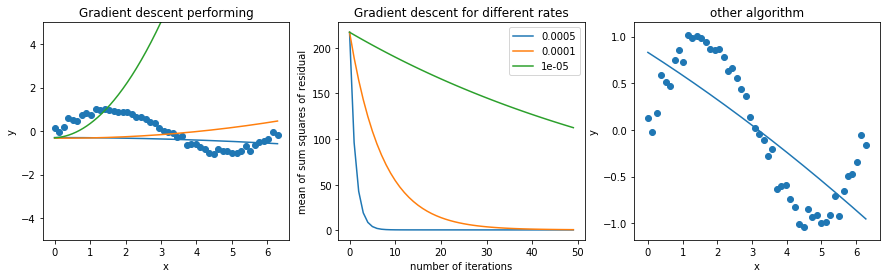

In [336]:
Xmat=Amat(2)
n,p=Xmat.shape
w0=np.random.randn(p)
num_iters=50
rates=[0.0005,0.0001,0.00001]
xinput=np.linspace(0,2*pi,500)
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,4))
ax[0].scatter(X,Y,marker='o')
ax[0].set_ylim(ymin=-5,ymax=5)
I=np.ones(p**2).reshape(p,p)
W=(np.linalg.inv(Xmat.T.dot(Xmat)+lamda*I)).dot(Xmat.T).dot(Y)
ax[2].plot(xinput,pred(2,W,xinput))
ax[2].scatter(X,Y,marker='o')



for i,r in enumerate(rates):
    wfin,whis,meanlosstrace=gradientdescent(Xmat,Y,w0,lamda,r,num_iters)
    ax[1].plot(meanlosstrace,label=r)
    ax[0].plot(xinput,pred(2,wfin,xinput),label=r)
ax[1].legend()
ax[1].set_title('Gradient descent for different rates')
ax[1].set_xlabel('number of iterations')
ax[1].set_ylabel('mean of sum squares of residual')
ax[0].set_title('Gradient descent performing')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[2].set_title('other algorithm')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')


Text(0,0.5,'y')

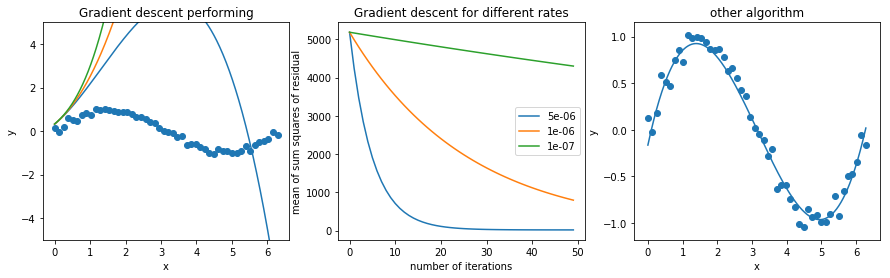

In [337]:
Xmat=Amat(3)
n,p=Xmat.shape
w0=np.random.randn(p)
num_iters=50
rates=[0.000005,0.000001,0.0000001]
xinput=np.linspace(0,2*pi,500)
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,4))
ax[0].scatter(X,Y,marker='o')
ax[0].set_ylim(ymin=-5,ymax=5)
I=np.ones(p**2).reshape(p,p)
W=(np.linalg.inv(Xmat.T.dot(Xmat)+lamda*I)).dot(Xmat.T).dot(Y)


ax[2].plot(xinput,pred(3,W,xinput))
ax[2].scatter(X,Y,marker='o')
for i,r in enumerate(rates):
    wfin,whis,meanlosstrace=gradientdescent(Xmat,Y,w0,lamda,r,num_iters)
    ax[1].plot(meanlosstrace,label=r)
    ax[0].plot(xinput,pred(3,wfin,xinput),label=r)
ax[1].legend()
ax[1].set_title('Gradient descent for different rates')
ax[1].set_xlabel('number of iterations')
ax[1].set_ylabel('mean of sum squares of residual')
ax[0].set_title('Gradient descent performing')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[2].set_title('other algorithm')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

In [338]:
W[1]

1.7273478833554436

In [339]:
n

50

Text(0,0.5,'y')

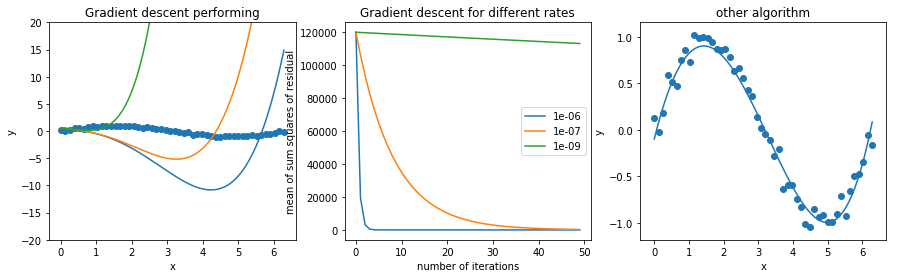

In [340]:
Xmat=Amat(4)
n,p=Xmat.shape
w0=np.random.randn(p)
num_iters=50
rates=[0.000001,0.0000001,0.000000001]
xinput=np.linspace(0,2*pi,500)
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,4))
ax[0].scatter(X,Y,marker='o')
ax[0].set_ylim(ymin=-20,ymax=20)
I=np.ones(p**2).reshape(p,p)
W=(np.linalg.inv(Xmat.T.dot(Xmat)+lamda*I)).dot(Xmat.T).dot(Y)


ax[2].plot(xinput,pred(4,W,xinput),label=r)
ax[2].scatter(X,Y,marker='o')
for i,r in enumerate(rates):
    wfin,whis,meanlosstrace=gradientdescent(Xmat,Y,w0,lamda,r,num_iters)
    ax[1].plot(meanlosstrace,label=r)
    ax[0].plot(xinput,pred(4,wfin,xinput),label=r)
ax[1].legend()
ax[1].set_title('Gradient descent for different rates')
ax[1].set_xlabel('number of iterations')
ax[1].set_ylabel('mean of sum squares of residual')
ax[0].set_title('Gradient descent performing')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[2].set_title('other algorithm')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

5.1.3(a)

In [341]:
X_train=X[0::2]
X_test=X[1::2]
Y_train=Y[0::2]
Y_test=Y[1::2]

In [342]:
X_test.shape

(25, 1)

In [343]:
def Amat(p):
    Xmat=[]
    for i in range(1,p+1):
        Xmat.append(g(X_test,i))
    Xmat=np.asarray(Xmat)
    Xmat=Xmat.reshape(p,25)
    Xmat=Xmat.T
    col1=np.ones(np.shape(Xmat)[0]).reshape(np.shape(X_test)[0],1)
    Xmat=np.concatenate((col1,Xmat),axis=1)
    return Xmat

degree is [1, 2, 3, 4, 5] 
value of loss function value is
 [0.20052071623922418, 0.20062851363405493, 0.019006936609390807, 0.018050901303717424, 0.006704328985058662] 
the minimum loss is 0.006704328985058662 
the degree is 5


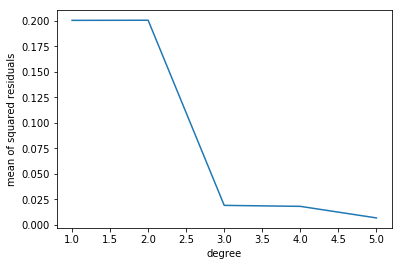

In [344]:
lamda=1
xinput=np.linspace(0,2*pi,500)
y_real=np.sin(xinput)
loss=[]
degree=[]
for k in range(1,6):
    degree.append(k)
    Xmat=Amat(k)
    n,p=Xmat.shape
    I=np.ones(p**2).reshape(p,p)
    W=(np.linalg.inv(Xmat.T.dot(Xmat)+lamda*I)).dot(Xmat.T).dot(Y_test)
    l1=y_real-pred(k,W,xinput)
    l=l1.T.dot(l1)+lamda*(W.T.dot(W))
    l=l/500
    loss.append(l) 
plt.plot(degree,loss)
plt.xlabel('degree')
plt.ylabel('mean of squared residuals')
print('degree is',degree,'\nvalue of loss function value is\n',loss,'\nthe minimum loss is',min(loss),
      '\nthe degree is',degree[loss.index(min(loss))] )
k=degree[loss.index(min(loss))]

5.1.3(b)

the minimum loss is 1.549702214742886 
the lambda is 0.0


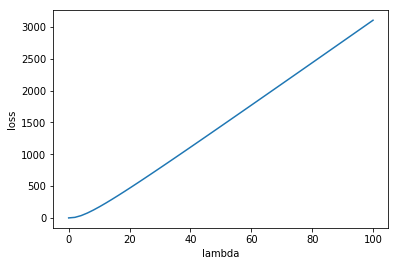

In [345]:
Xmat=Amat(k)
n,p=Xmat.shape
I=np.ones(p**2).reshape(p,p)
la=np.linspace(0,100)
lamda=[]
loss=[]
for ll in la:
    lamda.append(ll)
    W=(np.linalg.inv(Xmat.T.dot(Xmat)+ll*I)).dot(Xmat.T).dot(Y_test)
    lo=y_real-pred(k,W,xinput)
    l=lo.T.dot(lo)+ll*(W.T.dot(W))
    loss.append(l)
plt.plot(lamda,loss)
plt.xlabel('lambda')
plt.ylabel('loss')
print('the minimum loss is',min(loss),
      '\nthe lambda is',lamda[loss.index(min(loss))] )
